# About the Dataset - 
- This dataset contains information about used cars which is available for sale.

## Data dictionary - 
- name - Name of the cars 
- year - Year of the car when it was bought
- selling_price - Price at which the car is being sold
- km_driven - Number of Kilometres the car is driven
- fuel - Fuel type of car (petrol / diesel / CNG / LPG / electric)
- seller_type - Tells if a Seller is Individual or a Dealer
- transmission - Gear transmission of the car (Automatic/Manual)
- Owner - Number of previous owners of the car.

### Importing Required Libraries

In [1]:
#Mathematical operation
import numpy as np

#Data Manipulation
import pandas as pd

#Data Visualizaion
import matplotlib.pyplot as plt
import seaborn as sns

#Ml Algorithm
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

#Remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
df=pd.read_csv(r"C:\Users\Lenovo\Documents\jupyter\DataSets\CAR DETAILS FROM CAR DEKHO.csv")
df.sample(10)
df1=df.copy()

### Data Preprocessing
- In the data preprocessing phase we first examined the shape of the data to understand
its dimension
- Next, We checked for null values in the dataset and removed if any were found
- Additionally, we performed a check for duplicate values and removed them to ensure
data integrity
- To gain insights into relationships between different variables we performed univariate,bivariate
and multivariate analysis and then visualized the correlation map using a heatmap. This
visualization allowed us to identify the patterns and dependencies among the features
in the dataset.

In [3]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


**From above cell we see that there are 4340 observations and 8 columns in our dataset and there are 3 columns contain integer and 5 column contain object value and there are no null values in our dataset**

In [4]:
#check for duplicates
df.duplicated().sum()

763

**From above cell we see that there are 763 duplicates observations in our dataset**

In [5]:
#Print all duplicate values
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [6]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [7]:
#check for shape after droping duplicates
df.shape

(3577, 8)

**From above cell we see that after dropping duplicates there are 3577 observations and 8 columns in our dataset**

### Univariate analysis

**Fuel**

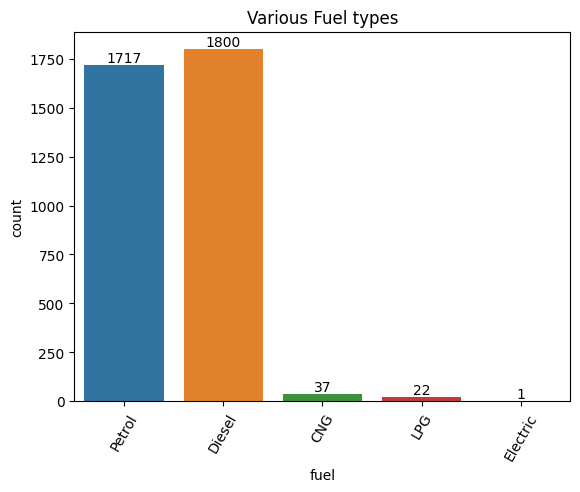

In [8]:
ax=sns.countplot(x='fuel',data=df)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=60)
plt.title("Various Fuel types")
plt.show()

**From above countplot we observe that there are majority of petrol and diesel car**

**Owner**

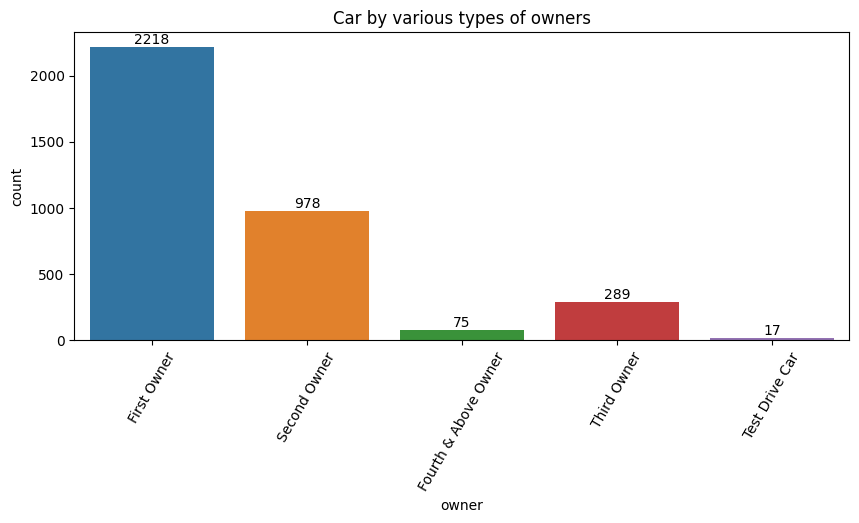

In [9]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x='owner',data=df)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=60)
plt.title("Car by various types of owners")
plt.show()

**From above cell we see that there are majority of first owner car's with 2832 counts**

**seller_type**

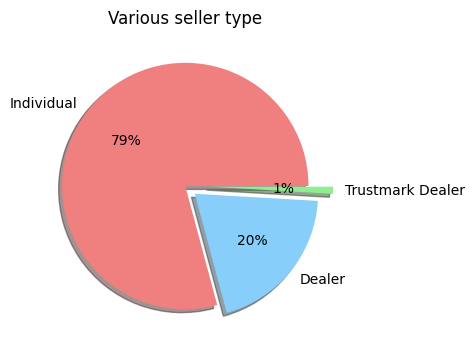

In [10]:
x=df['seller_type'].value_counts()
y=x.index
plt.figure(figsize=(10,4))
plt.pie(x=x,labels=y, autopct='%.0f%%',shadow=True,colors = ['lightcoral', 'lightskyblue','lightgreen'],explode=(0,0.1,0.2))
plt.title("Various seller type")
plt.show()

**From above pie plot we see that there are 75% individual car seller's and 23% dealer and 2% trustmark dealer**

**Transmission**

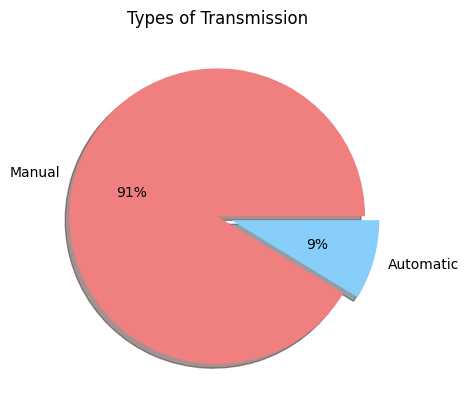

In [11]:
x=df['transmission'].value_counts()
y=x.index
plt.pie(x=x,labels=y,autopct='%.0f%%',shadow=True,colors = ['lightcoral', 'lightskyblue'],explode=(0,0.1))
plt.title('Types of Transmission')
plt.xticks(rotation=60)
plt.show()

**From above pie plot we see that there are 90% manual car and 10% Automatic car's.**

**Year**

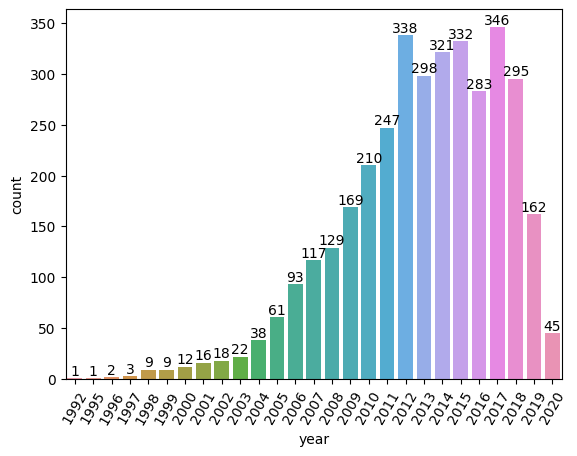

In [12]:
ax=sns.countplot(x='year',data=df)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=60)
plt.show()

**From above count plot we see that there are maximum car is from 2017 and we have car from year 1992 to 2020.**

### Bivariate analysis

**Selling_price and Km_driven**

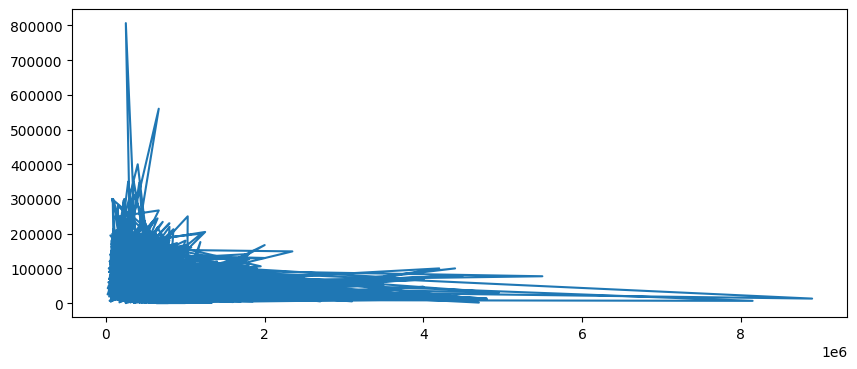

In [13]:
plt.figure(figsize=(10,4))
plt.plot(df['selling_price'],df['km_driven'])
plt.show()

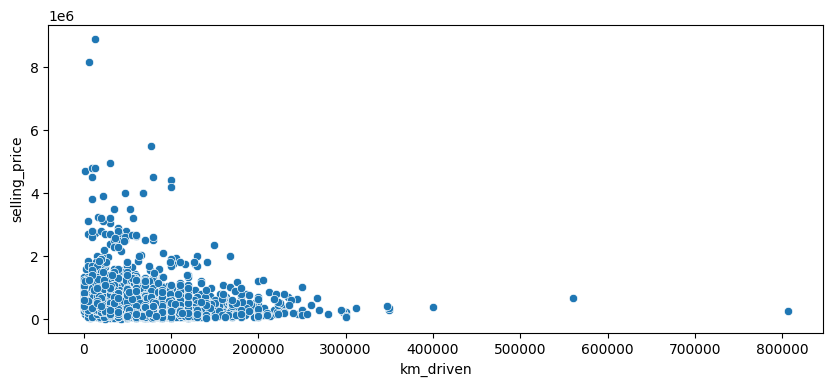

In [14]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=df['km_driven'],y=df['selling_price'])
plt.show()

**From above scatter plot we observe that there are outliers in the selling price and also in km_driven columns
let's visualize boxplot**

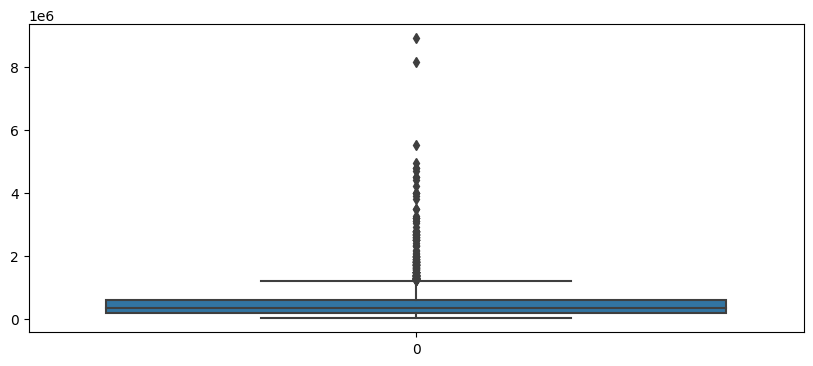

In [15]:
plt.figure(figsize=(10,4))
sns.boxplot(df['selling_price'])
plt.show()

**From above boxplot we see that there are many outliers in our selling_price column**

Text(0.5, 1.0, 'Distribution of selling price')

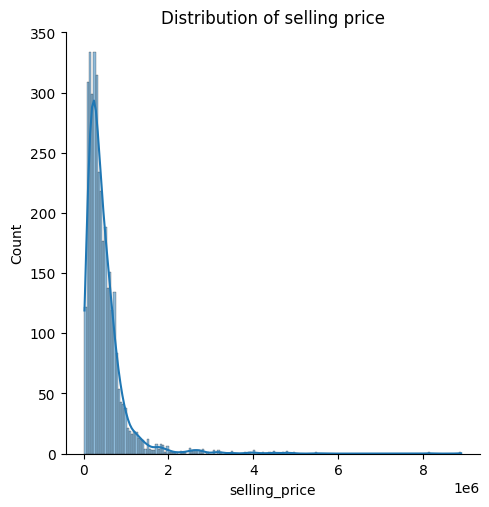

In [16]:

sns.displot(df['selling_price'],kind='hist',kde=True)
plt.title("Distribution of selling price")

**From above displot we see that in selling price there are right skewed data majority of the data is from 0X10^6 to 4X10^6 so we can drop outliers from 4X10^6 to last.**

In [17]:
#Print outliers values
df[df['selling_price']>4000000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner
101,Mercedes-Benz E-Class Exclusive E 200 BSIV,2018,4500000,9800,Petrol,Dealer,Automatic,First Owner
539,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,2014,4400000,100000,Diesel,Individual,Automatic,Second Owner
555,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
963,Audi A5 Sportback,2020,4700000,1500,Diesel,Individual,Automatic,First Owner
3453,BMW 5 Series 520d Luxury Line,2018,4800000,9422,Diesel,Individual,Automatic,First Owner
3872,Audi RS7 2015-2019 Sportback Performance,2016,8900000,13000,Petrol,Dealer,Automatic,First Owner
3875,Land Rover Range Rover 4.4 Diesel LWB Vogue SE,2010,4200000,100000,Diesel,Dealer,Automatic,First Owner
3883,BMW 5 Series 520d Luxury Line,2019,4800000,12999,Diesel,Dealer,Automatic,First Owner
3969,Mercedes-Benz GLS 2016-2020 350d 4MATIC,2016,5500000,77350,Diesel,Dealer,Automatic,First Owner


**From above cell we see that there are costly car's like as Mercedes-Benz,Audi,BMW etc. so we can say that this data is not useful for our**

In [18]:
#Extract indeex of outliers
x=df[df['selling_price']>4000000].index.to_list()
x

[89, 101, 539, 555, 963, 3453, 3872, 3875, 3883, 3969, 4047]

In [19]:
#Drop outliers
df.drop(index=x,inplace=True)

In [20]:
#check for outliers remove or not
df[df['selling_price']>4000000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner


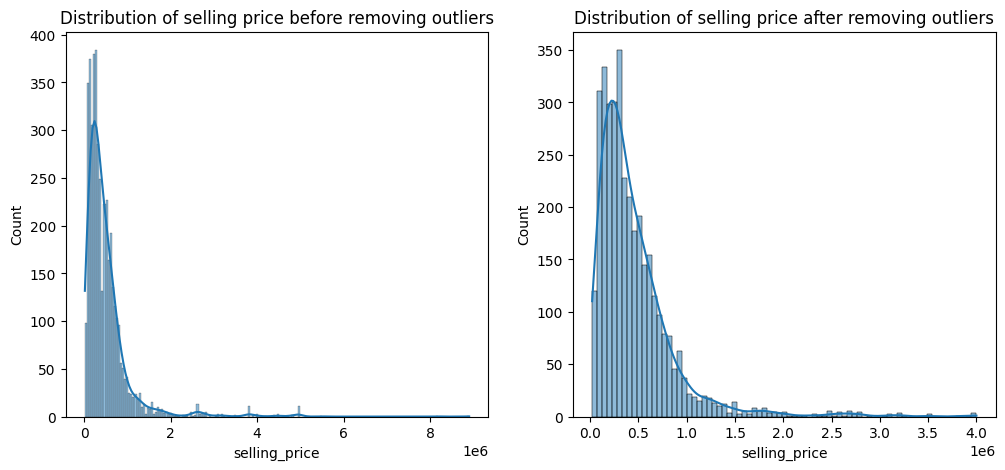

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))

sns.histplot(df['selling_price'],kde=True,ax=axes[1])
sns.histplot(df1['selling_price'],kde=True,ax=axes[0])
axes[0].set_title('Distribution of selling price before removing outliers')
axes[1].set_title('Distribution of selling price after removing outliers')

plt.show()

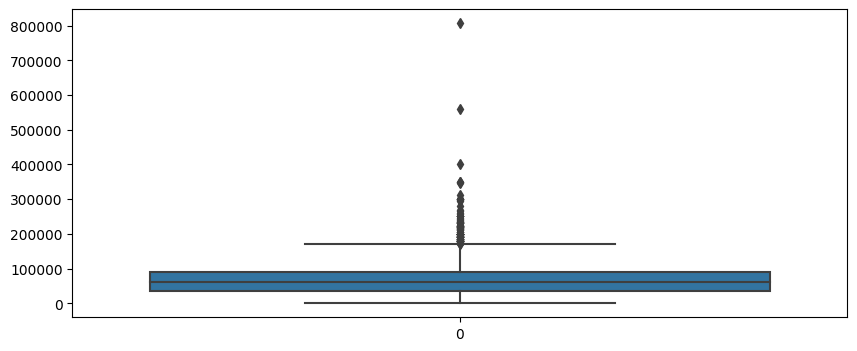

In [22]:
plt.figure(figsize=(10,4))
sns.boxplot(df['km_driven'])
plt.show()

**From above boxplot we see that outliers is also present in our km_driven column let's see the distribution of km_driven column**

Text(0.5, 1.0, 'Distribution of km_driven')

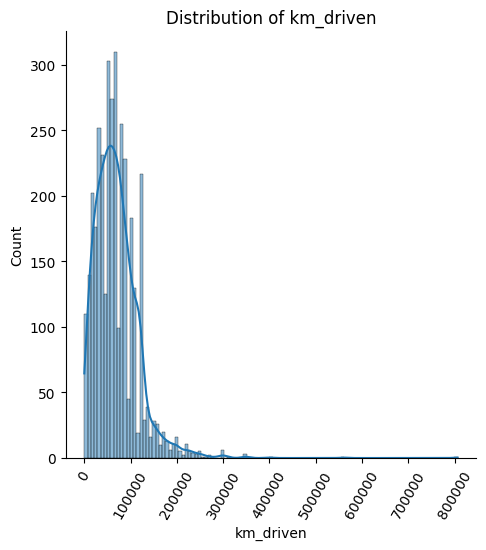

In [23]:

sns.displot(df['km_driven'],kde=True)
plt.xticks(rotation=60)
plt.title("Distribution of km_driven")


**From above displot we see that in km_driven column there are right skewed data and majority of the data is present in the range 0-200000 kilometer so we can remove the outlier from 200000 to last let's do it**

In [24]:
z=df[df['km_driven']>200000].index.to_list()
df[df['km_driven']>200000]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
69,Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,2010,280000,350000,Diesel,Individual,Manual,Second Owner
70,Toyota Corolla Altis Diesel D4DG,2011,350000,230000,Diesel,Individual,Manual,First Owner
197,Mahindra Xylo E4,2009,229999,230000,Diesel,Individual,Manual,Third Owner
225,Mahindra Renault Logan 1.5 DLS,2008,89999,213000,Diesel,Individual,Manual,First Owner
324,Mahindra XUV500 W8 2WD,2012,850000,212814,Diesel,Dealer,Manual,First Owner
394,Mahindra Scorpio REV 116,2006,220000,220000,Petrol,Individual,Manual,Second Owner
502,Maruti Swift Ldi BSIII,2009,300000,217871,Diesel,Dealer,Manual,First Owner
525,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner
656,Tata Safari Storme VX,2013,360000,206500,Diesel,Individual,Manual,First Owner
821,Hyundai EON Magna Plus,2013,125000,205000,Petrol,Individual,Manual,First Owner


**From above cell we see that there are 53 observations in our data with outlier so let's remove it**

In [25]:
df.drop(index=z,inplace=True)

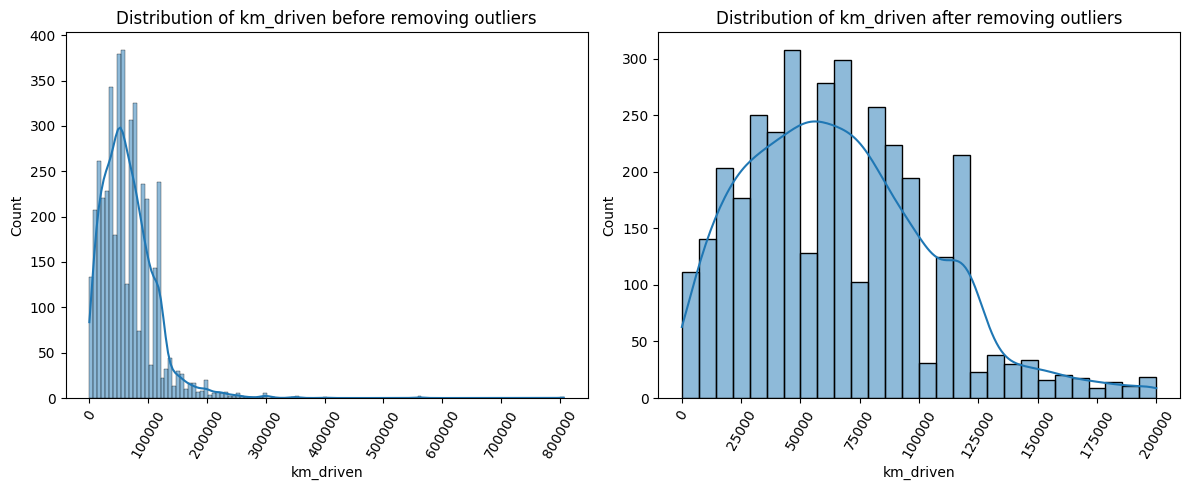

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(df['km_driven'], kde=True, ax=axes[1])
sns.histplot(df1['km_driven'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of km_driven before removing outliers')
axes[1].set_title('Distribution of km_driven after removing outliers')
axes[0].tick_params(axis='x', rotation=60)  
axes[1].tick_params(axis='x', rotation=60)  

plt.tight_layout()  
plt.show()

**owner and selling_price**

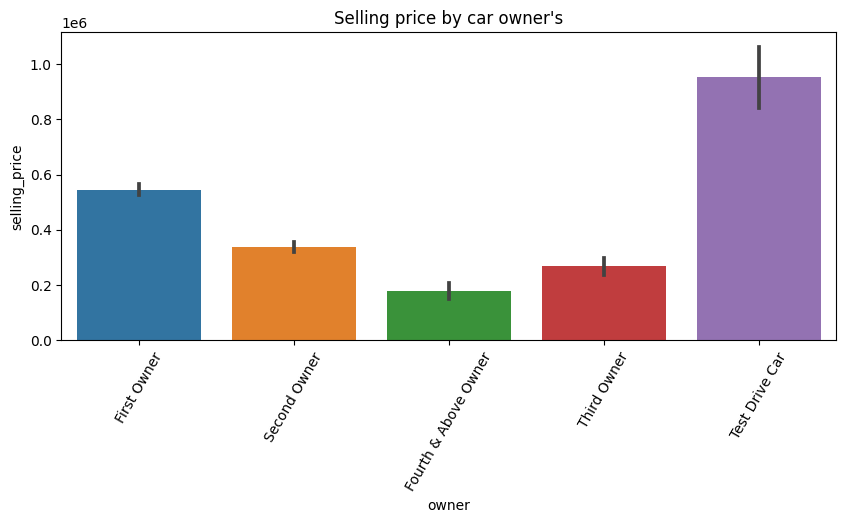

In [27]:
plt.figure(figsize=(10,4))
sns.barplot(x='owner',y='selling_price',data=df)

plt.title("Selling price by car owner's")

plt.xticks(rotation=60)
plt.show()

**From above barplot we see that there are average price of Test drive car is high and second highest price of first owners car**

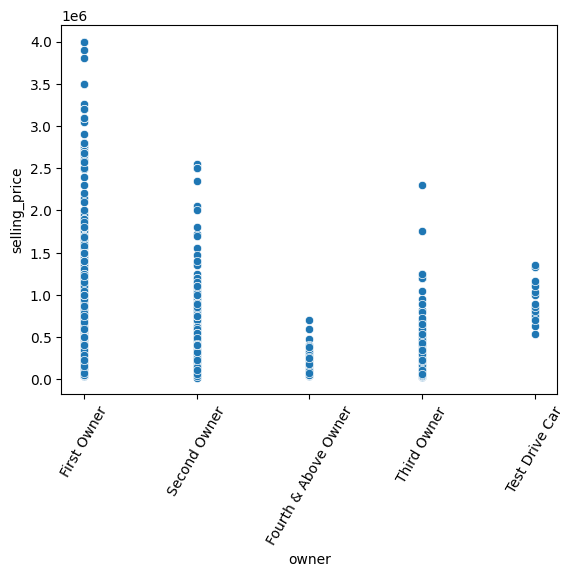

In [28]:
sns.scatterplot(x='owner',y='selling_price',data=df)
plt.xticks(rotation=60)
plt.show()

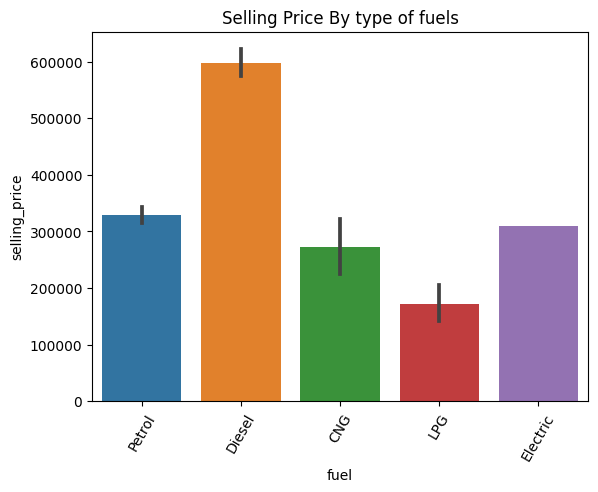

In [29]:
sns.barplot(x='fuel',y='selling_price',data=df)
plt.xticks(rotation=60)
plt.title("Selling Price By type of fuels")
plt.show()

**From above barplot we see that average price of diesel car is high in comparison of another type of car**

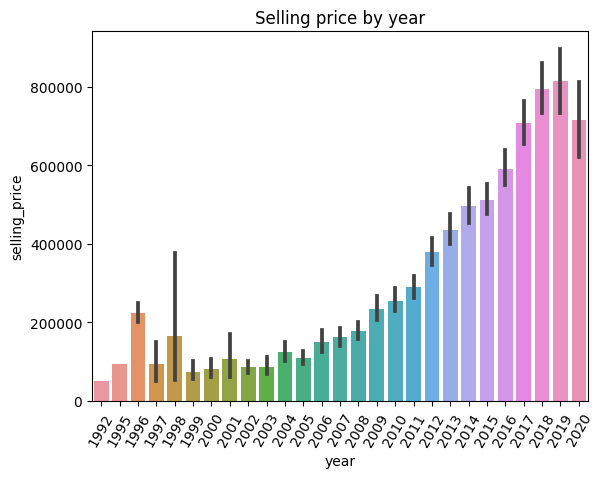

In [30]:
sns.barplot(x='year',y='selling_price',data=df)
plt.xticks(rotation=60)
plt.title("Selling price by year")
plt.show()

**From above plot we see that most expensive car's is from 2019 year**

### Ml modelling

In [31]:
#Label Encoding
le=LabelEncoder()
df['owner']=le.fit_transform(df['owner'])
df['fuel']=le.fit_transform(df['fuel'])
df['seller_type']=le.fit_transform(df['seller_type'])
df['transmission']=le.fit_transform(df['transmission'])

**We know that in our data there is categorical column so we have to convert these columns values into discrete(numeric) for ml modelling for this we use label encoder to encode these values**

In [32]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,1,1,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,1,1,2
4337,Maruti 800 AC BSIII,2009,110000,83000,4,1,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,1,1,0


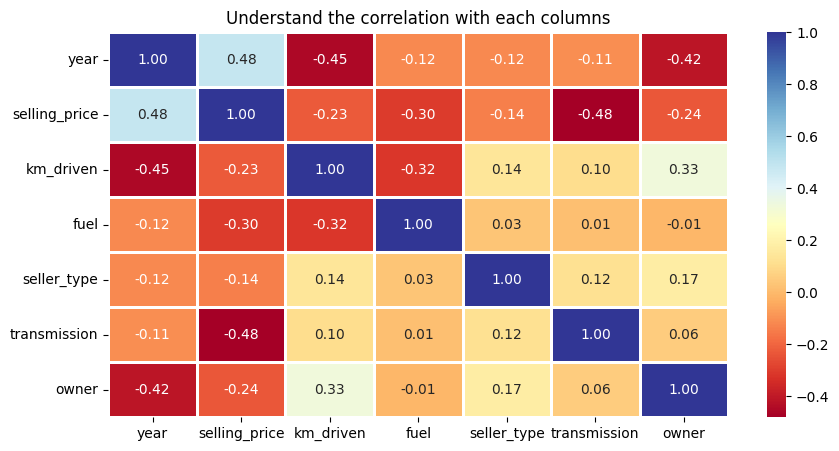

In [33]:
# Visualize the correlation map
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='RdYlBu',fmt='.2f',
    annot_kws=None,
    linewidths=1)
plt.title("Understand the correlation with each columns")
plt.show()

**From above heatmap we see that the year and transmission is highly correlated with our target variable selling_price apart from this fuel km_driven and owner is also correlated with target feature**

In [34]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [35]:
x=df[[ 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]
y=df[['selling_price']]

**In above cell i created two dataframe x and y where x contain highly correlated features and y contain target variable**

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In Above cell- 
- The code splits the dataset into `training` and `testing` sets using the `train_test_split()` function from sklearn.
- The training set is used to train the models, and the testing set is used to evaluate their performance.

- Take `test_size` ratio of `70:30` it means we give 70% data to training and 30% for testing 
- `random_state` = `1` (it means that it takes one observations randomly.)

In [37]:
reg=linear_model.LinearRegression()
#fit the model
reg.fit(x_train,y_train)

LinearRegression()

**In above cell we fit the linear regression ml model on training dataset**

In [38]:

regp=reg.predict(x_test)

**In above cell we predict the value of selling price using trained model**

In [39]:
#Reshaping the predicted  array
regp
regp = np.array(regp).reshape(-1)

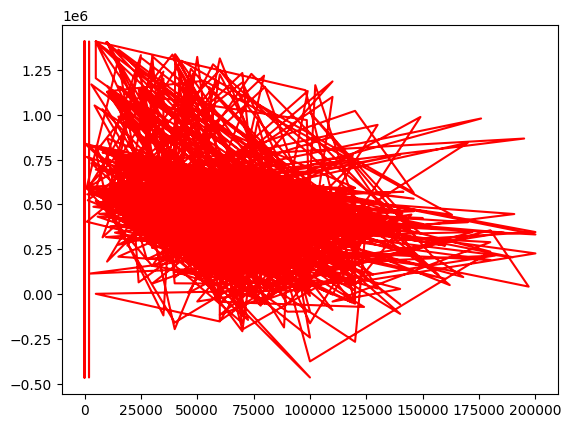

In [40]:
plt.plot(x_test, regp, color = 'red')
plt.show()

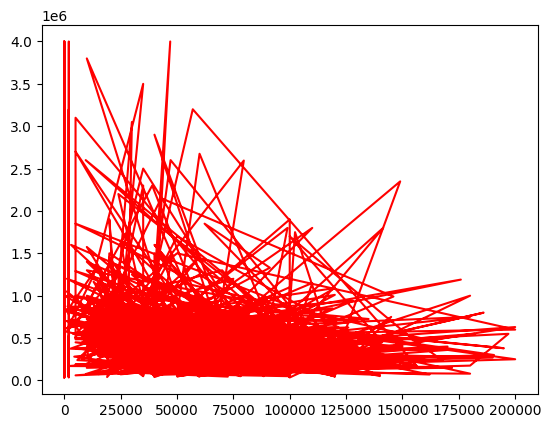

In [41]:
plt.plot(x_test, y_test, color = 'red')
plt.show()

In [42]:
new = pd.concat([x_test.km_driven.reset_index(drop = True), pd.Series(regp)], axis = 1)
new.sort_values(by='km_driven',inplace=True)
new

,km_driven,0
180,101,839004.126027
907,1000,589981.077294
729,1000,764679.718474
983,1001,404166.107466
813,1010,597077.637472
...,...,...
702,195000,866733.281972
42,197000,43236.256674
781,200000,346750.753640
271,200000,227930.362645


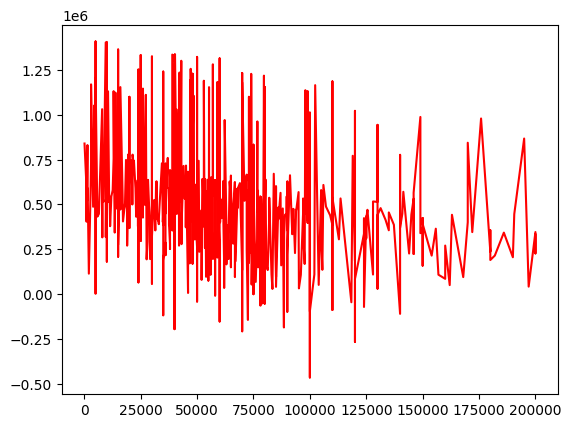

In [43]:
plt.plot(new['km_driven'], new[0],color= 'red')
plt.show()

In [44]:


rmse = np.sqrt(mean_squared_error(y_test, regp))
print("RMSE:", rmse)



RMSE: 318072.7053235516
